## Iabac Project - INX Future Inc Employee Performance Analysis
### PROJECT Code: 10281


### Dataset Information:
INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider 
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 
years. INX human resource policies are considered as employee friendly and widely perceived as best 
practices in the industry.
Recent years, the employee performance indexes are not healthy and this is becoming a growing 
concerns among the top management. There has been increased escalations on service delivery and 
client satisfaction levels came down by 8 percentage points.
CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing 
employees as this would affect the employee morale of all the employees in general and may further 
reduce the performance. Also, the market perception best employer and thereby attracting best talents 
to join the company.Thus we should analyse the current employee data and find 
the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects 
the findings of this project will help him to take right course of actions. He also expects a clear indicators 
of non performing employees, so that any penalization of non-performing employee, if required, may 
not significantly affect other employee morals.


#### Business Case: 
#### 1.To analyze Department wise performances
#### 2.To find top 3 Important Factors effecting employee performance
#### 3.To predict the employee performance based on factors as inputs.
#### 4.To provide Recommendations to improve the employee performance based on insights from analysis.


##### Importing necessary libraries

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
import warnings
warnings.filterwarnings('ignore')

##### Loading  the data

In [95]:
data=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

###### Basic Checks

In [96]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [97]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


### Domain Analysis

***EducationalBackground-***Subject wise educational qualification each employee have.

***EmpDepartment-***The department each employees are working with.

***EmpJobRole-*** Current job associated to each employee.

***BusinessTravelFrequency-***How often employees travel for business purpose.

***DistanceFromHome-***Distance that have to be covered by each employee to reach company fom their home.

***EmpEducationLevel-***Is the employees having high or low rate of educational level.

***EmpEnvironmentSatisfaction-***Satisfaction rate each employee having from their working environment.

***EmpJobInvolvement-***How much each employees are involved in the job associated with them.

***EmpJobLevel-***Is the employees having high or low rate of job level.

***EmpJobSatisfaction-***at what level each employee is satisfied with their job.

***NumCompaniesWorked-***How many companies they have worked before.

***OverTime-***Does the employees work overtime or not.

***EmpLastSalaryHikePercent-***Percent of last salary hike each employee attained.

***EmpRelationshipSatisfaction-***Satisfactory level of each employee relationship.

***TotalWorkExperienceInYears-***Years of work experience each employee have.

***TrainingTimesLastYear-***How much training time did each employee got last year.

***EmpWorkLifeBalance-***How much Work life balance each employee is getting.

***ExperienceYearsAtThisCompany-***Years of work experience each employee have at this company.

***ExperienceYearsInCurrentRole-***Years of experience each employee have in their current role.

***YearsSinceLastPromotion-***How many years it has been since their last promotion.

***YearsWithCurrManager-***How many years of experience does each employee have with their current manager.

***Attrition-***Does employees want to leave the company or not.

***PerformanceRating-***It is the target feature.The performance rating each employee has acquired.

In [98]:
data.shape

(1200, 28)

***observation:
    The dataset contains 1200 observations and 28 attributes***

In [99]:
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [101]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

***Observation:There are no null values but since there are features in categorical form we have to convert them to numericals***

In [102]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


***Observation:***

***There are no null and constant values present***

***The avg employee last salary hike percent is 15.22, min hike percent is 11 and max hike percent is 25***

***The min work experience of an employee is 0 and max is 40 years.***

***The min training time last year for an employee was 0 and max was 6 years.***

In [103]:
data['PerformanceRating'].value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [104]:
data['PerformanceRating'].unique()

array([3, 4, 2], dtype=int64)

## Exploratory Data Analysis(EDA)

### Univariate Analysis

In [105]:
data=data.drop(['EmpNumber'],axis=1)

In [14]:
!pip install sweetviz     

Defaulting to user installation because normal site-packages is not writeable


In [15]:
import sweetviz as sv            # library for univariant analysis
my_report = sv.analyze(data)     # pass the original dataframe
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


***Observation:***

***Age-*** The employees around the age 30-40 is more and around 20 and 60 are less.

***Gender-*** We have more male employees than female emloyees.

***EducationBackground-*** Most employees are from life science and medical educational background.

***EmpDepartment-*** Most employees are from Development,sales,research and development department.

***EmpJobRole-*** We have more people under sales executive and developer post and very less employees for business analyst, data scientist and research director roles.

***BusinessTravelFrequency-*** Around 70% of employees travel rarely for busiess, 20% travel frequently and 10% doesn't travel at all.

***DistanceFromHome-*** Most employees lives near to the office itself

***EmpEducationLevel-*** More than 35% of employees have 3rd level education rating,around 25% have a rating of 4 and only 10% have a rating around 1

***EmpEnvironmentSatisfaction-*** Around 30% people have rated 3 and 4 for environmental satisfaction of job.

***EmpHourlyRate-***The amount paid to an employee for each hour worked.

***EmpJobInvolvement-*** Around 60% employees has rated 3 for their involvement in their job and only 5% rated 1.

***EmpJobLevel-***It set the responsibility level and expectations.

***EmpJobSatisfaction-*** Around 33% employees has rated 4 for job satisfaction and  17% have given 1.

***NumCompaniesWorked-*** It shows that most people hasn't worked in any other companies before.

***OverTime-*** Around 30% employees are having overtime work and around 70% doesn't have overtime works.

***EmpLastSalaryHikePercent-***salary hike percent of employee in last year.

***EmpRelationshipSatisfaction-***Healthy relationships may motivate employees and increase morale. When employees cast aside relationship issues, they can focus on work tasks more effectively.

***TotalWorkExperienceInYears-*** Around 30% employees are having 10 years of work experience, 12% have 1-4 years of experience and less than 5% have more than 25 years experience.

***ExperienceYearsAtThisCompany-*** Above 30% employees have only 1-7 years exp in this company and 2-4 years experience in their current roles.

***YearsSinceLastPromotion-*** For more than 60% employees the last promossion was issued before 1 year only.

***Attrition-*** More than 80% of employees are not thinking about attrition and around 13% are thinking about attrition

***PerformanceRating-*** Around 72% employees are having performance rate about 3 and only 13% are having the rating 2(which is the least given).

In [35]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## Bivariate Analysis

In [110]:
## Create a new dataframe with numerical variables only(Check the datatype by using info function)
data2=data[['Age','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

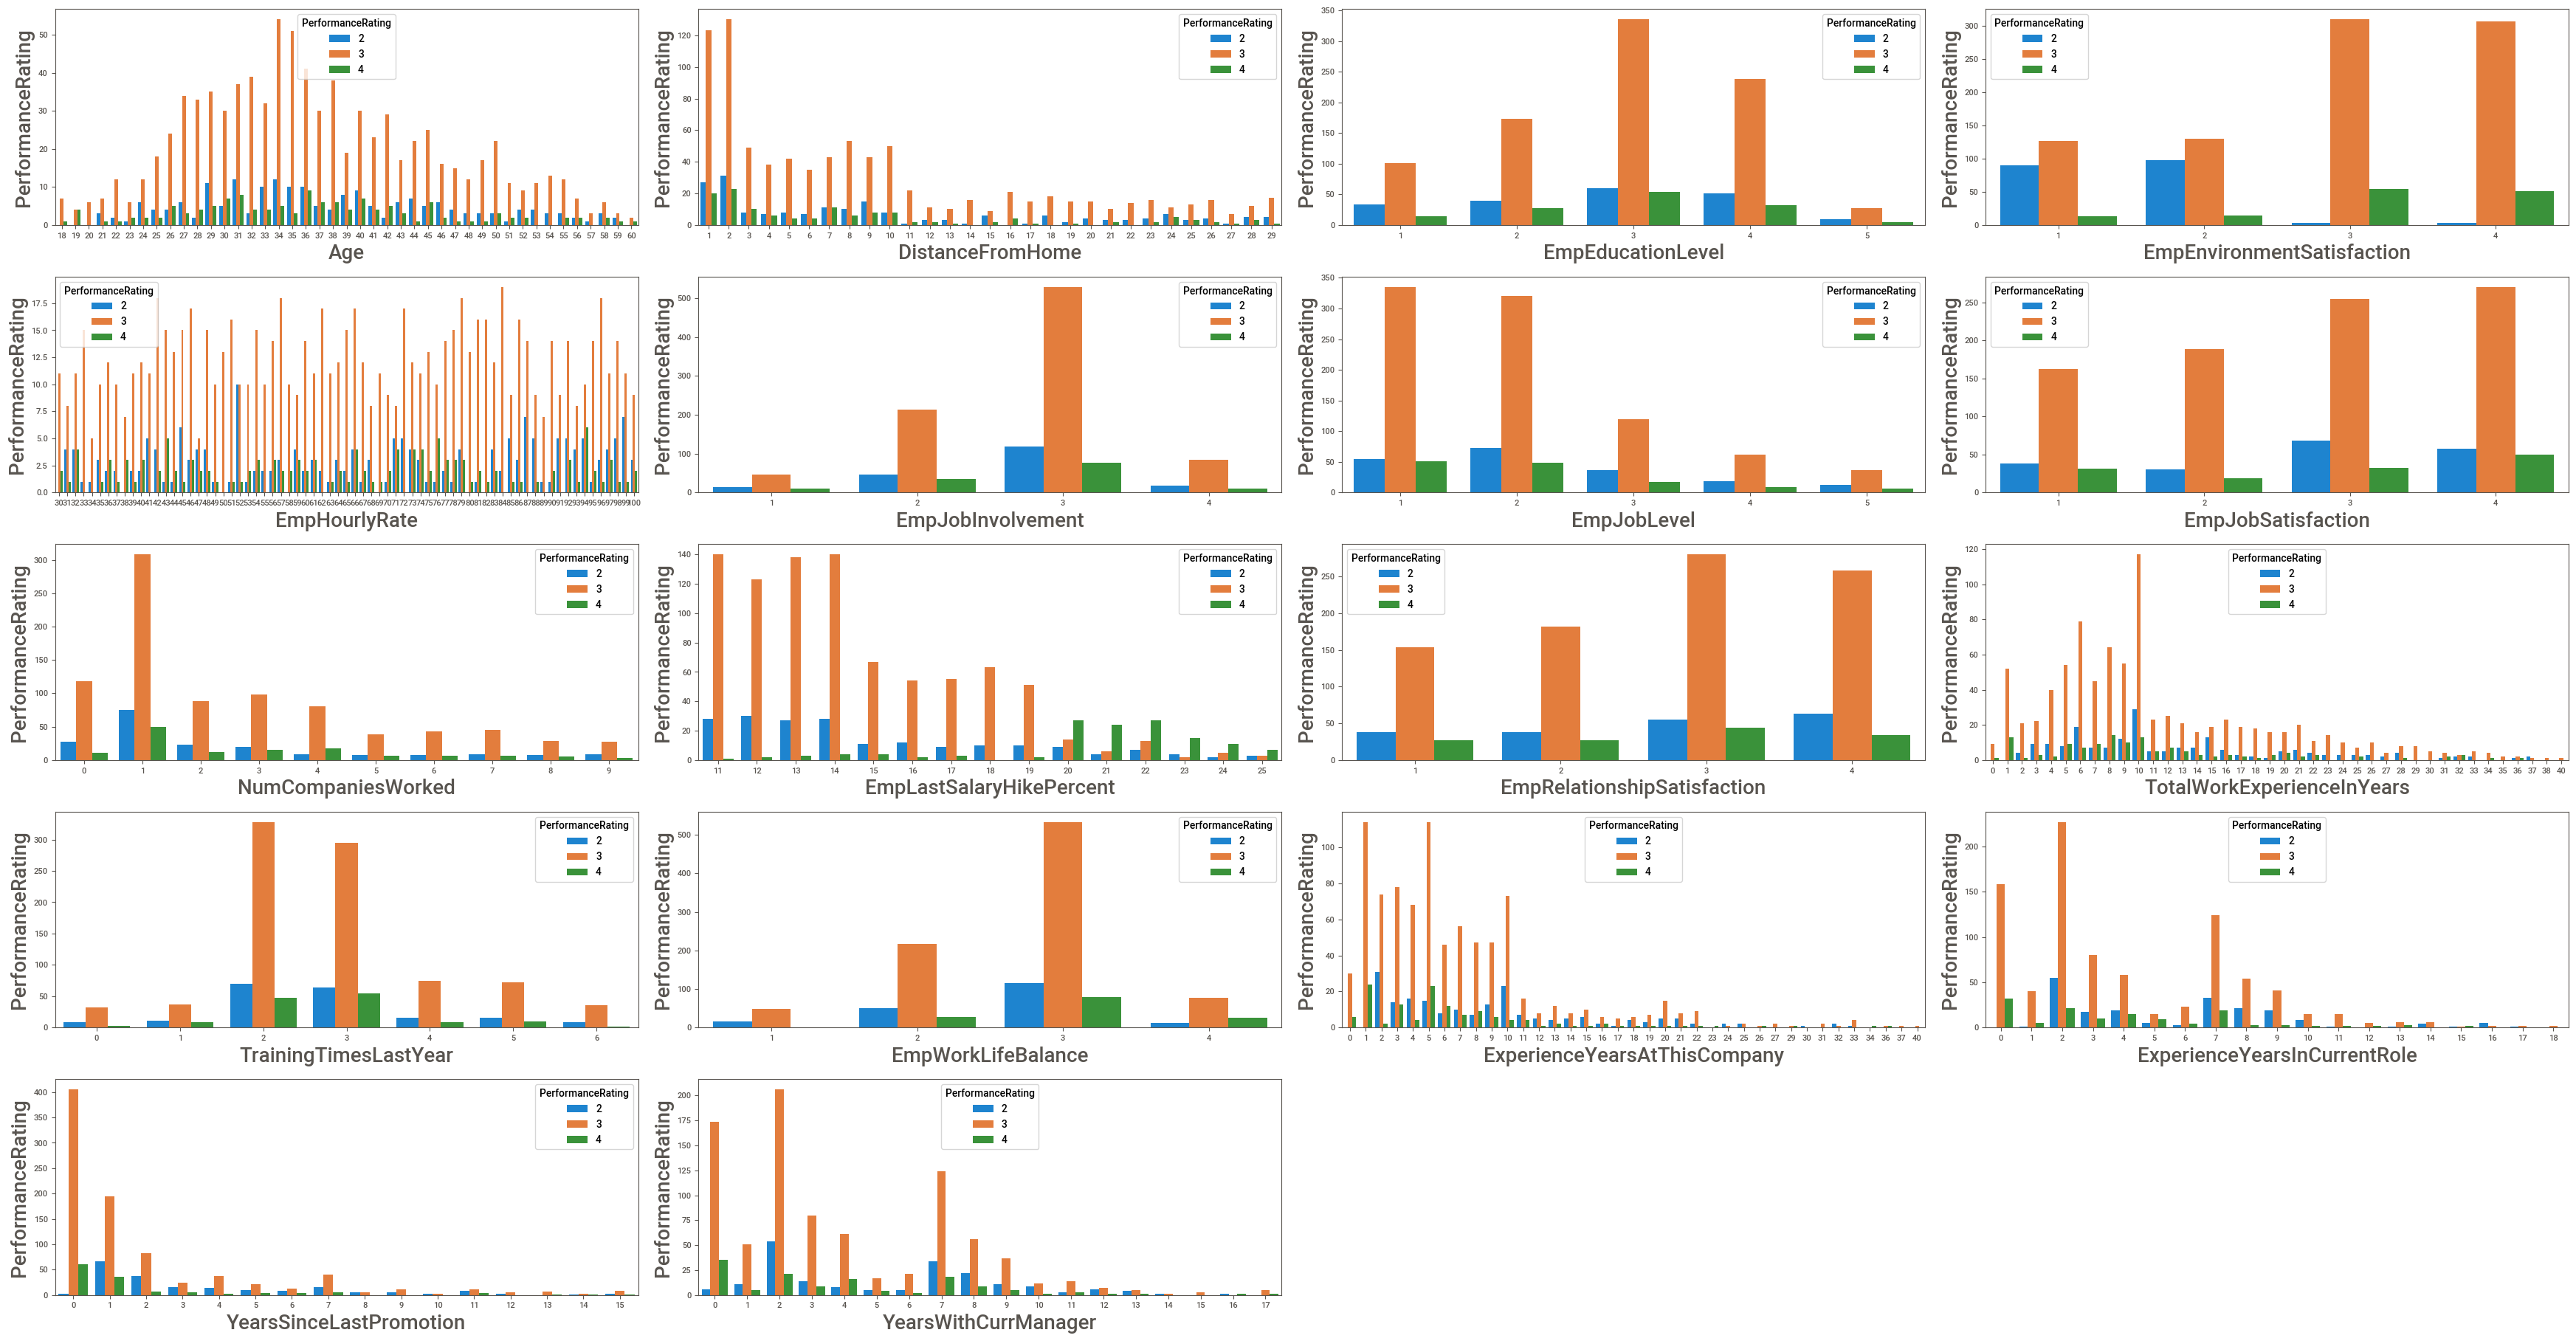

In [18]:
plt.figure(figsize=(35,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data2:#accessing the columns 
    if plotnumber<=28:
        ax = plt.subplot(7,4,plotnumber)
        sns.countplot(x=data2[column]
                        ,hue=data.PerformanceRating)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('PerformanceRating',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

***Observation:***

***Age-*** The best performance rate are given by employees of age group 25-50 and leat performance rate is given by age group of 18-24 and 51-60.Almost more than 50 employees around age 34-35 are giving highest performance rate.

***DistanceFromHome-*** The best performance rate are given by employees who lives nearby to company.The highest performance rate is given by employees whose distance from home is around 1-2km and least is given by employees whose distance from home is around 11-29km.

***EmpEducationLevel-*** Employees having education level around 3-4 rating are giving high performance rate to the company and the least performance rate is given by employees having 1-2 and 5 rating of education level.

***EmpEnvironmentSatisfaction-*** Emploees having environment satisfaction around 3-4 rate are giving high performance rate and that having 1-2 rate are giving lesser erformance rate.

***NumCompaniesWorked-*** Employees who have worked with 0-1 other companies are giving higher performance rate than the employees who have worked in more than 2 companies.

***EmpLastSalaryHikePercent-*** Employees having last salary hike percent of 11-14 are giving best performance rate and employees having hike around 15-19 are giving lesser performance rate than the prior. and employees with a hike of 20-25 are giving least performance rate.

***EmpRelationshipSatisfaction-*** Employees having a relationship satsfctn around 3-4 rate are giving high performance rate.

***TotalWorkExperienceInYears-*** Employees having a total wrk exp of 1 year and around 4-10 are giving high performance rate and employees with a work experence of 11-40 are giving least performance rate.The employees having 10 years of working experience are giving best performance rate.

***TrainingTimesLastYear-*** Employees having last year training time of 2-3 rate are giving best performance.

***EmpWorkLifeBalance-*** Employees having work life balance of rate 3 are giving high performance and those having 1 and 4 rating are giving least performance rate.

***ExperienceYearsAtThisCompany-*** Employees having 0-10 years of experience at this company are giving highest performance rate and those with 11-40 experience are giving the least performance rate.

***ExperienceYearsInCurrentRole-*** Here employees having 0, 2-4 and 7 years of experience in current role are giving highest performance rate.

***YearsSinceLastPromotion-*** Employees that had last promotion since 0-2 years are giving highest performance rate and all others are giving least performance rate.

***YearsWithCurrManager-*** Employees having 0-4 and 7-9 years of experience with current manager are giving highest performance rate.

In [19]:
## Create a new dataframe with categorical variables only(Check the datatype by using info function)
data1=data[['Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','OverTime','Attrition']]

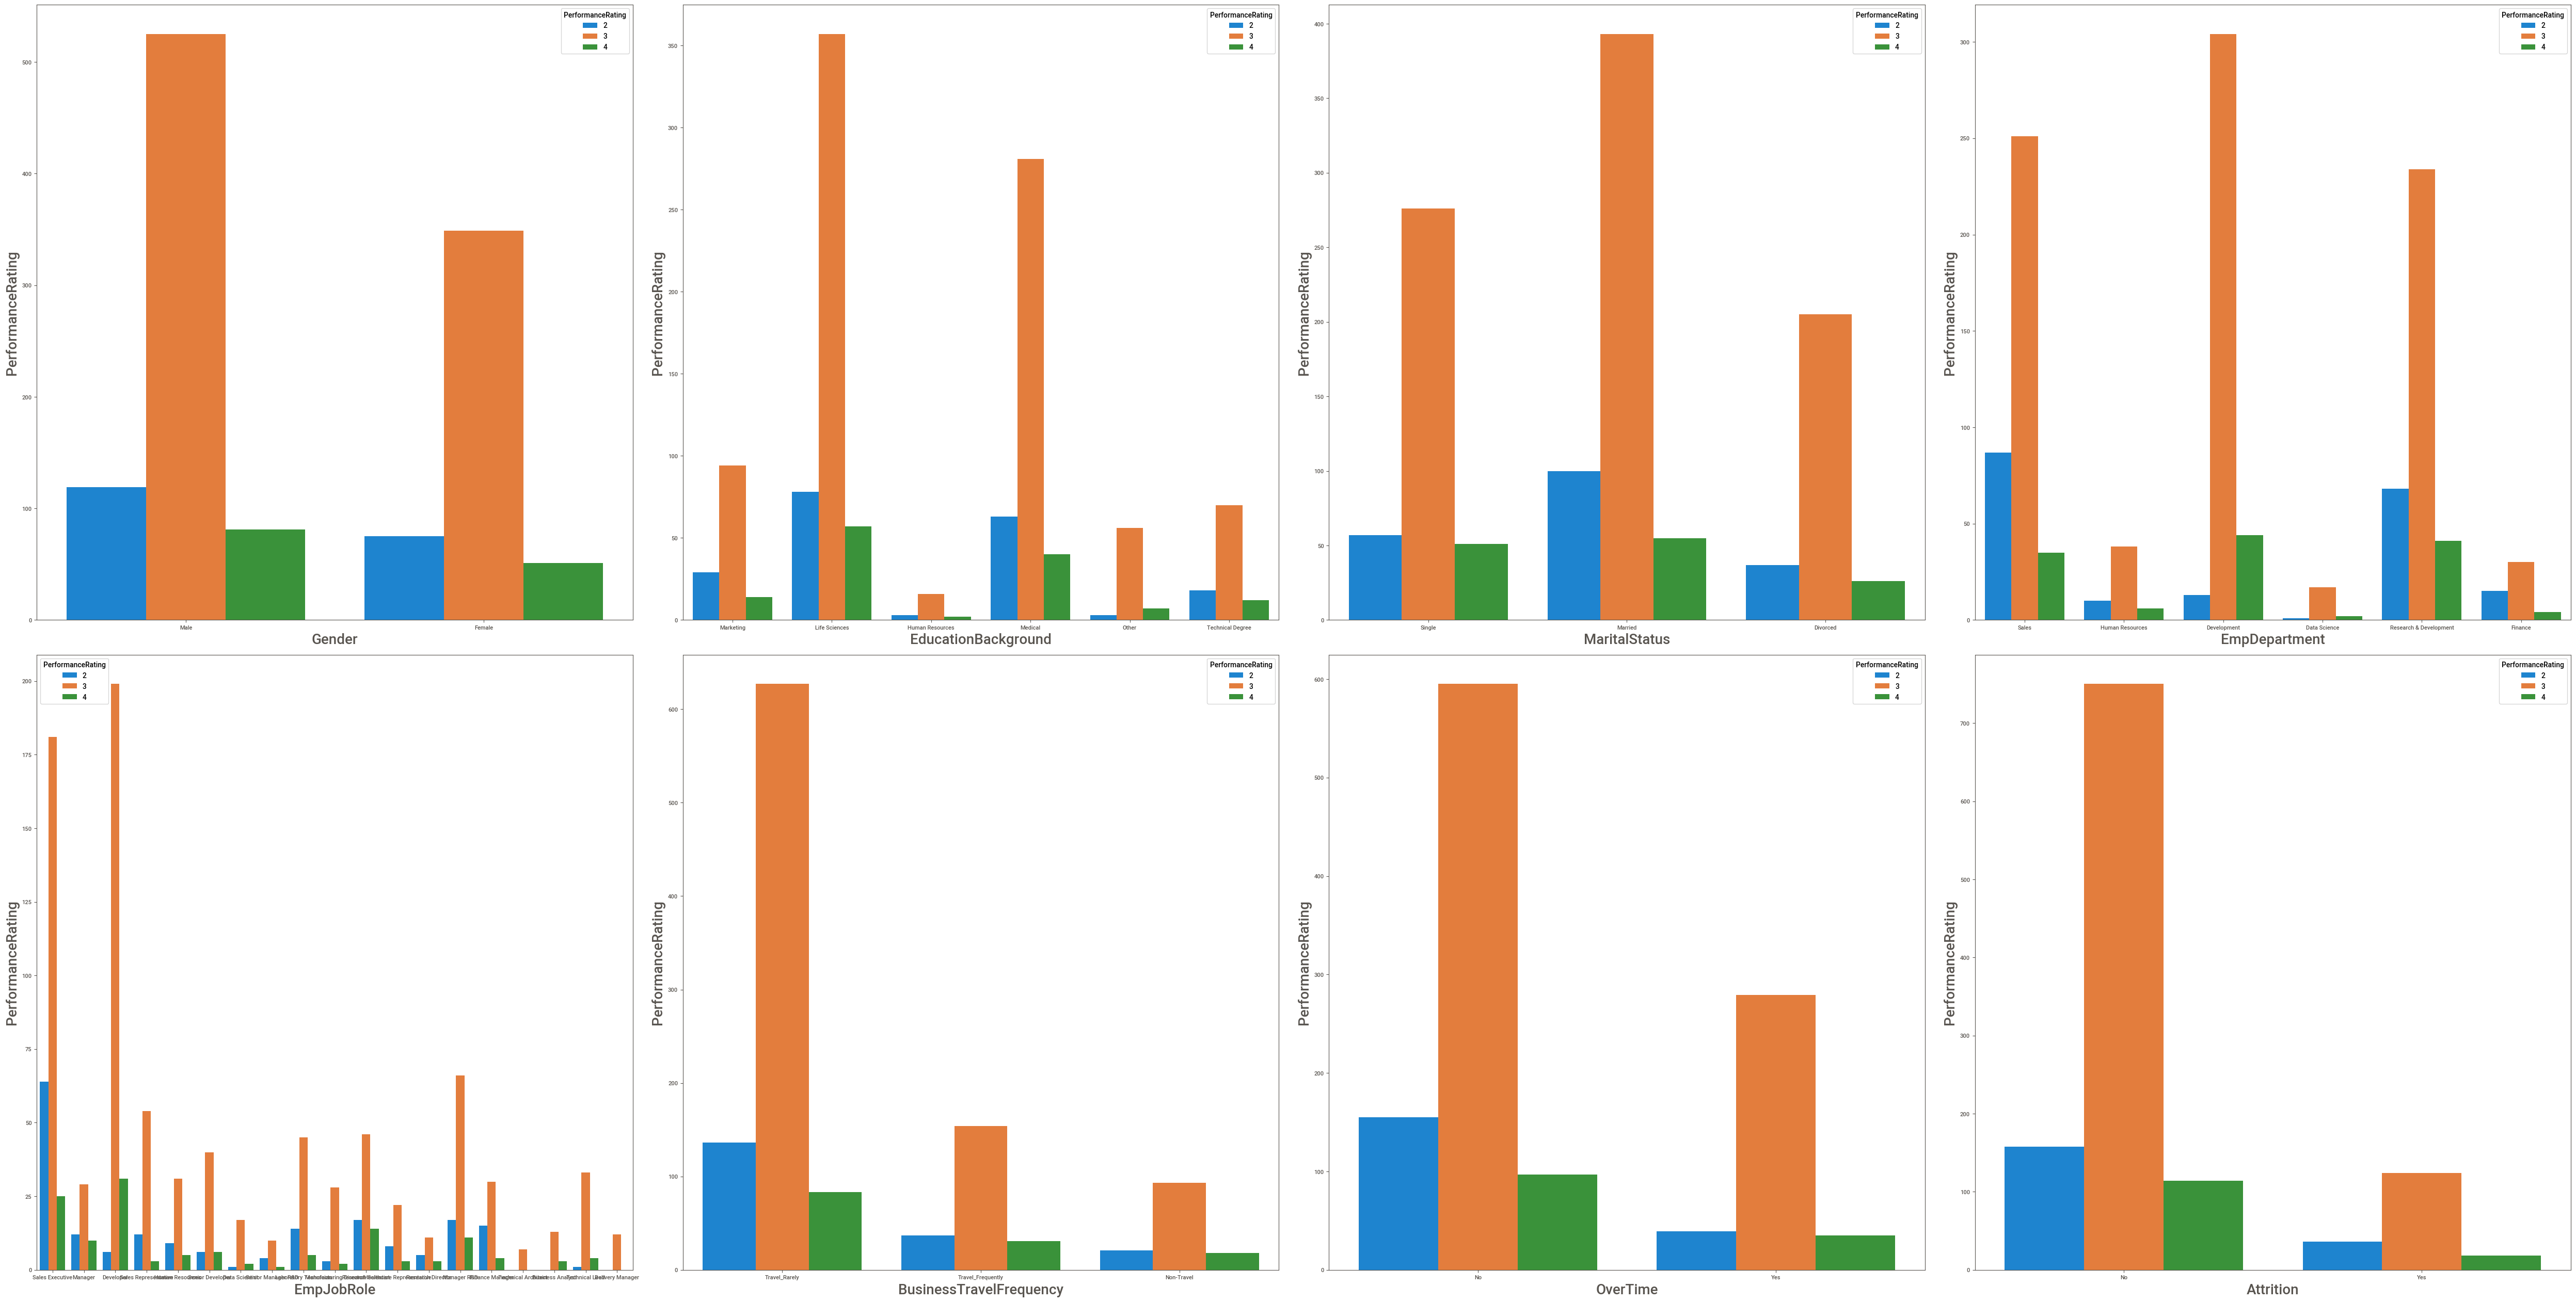

In [20]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(50,50), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data1:#for loop to acess columns form data1
    if plotnumber<=16:#checking whether count variable is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=data1[column].dropna(axis=0)#plotting count plot 
                        ,hue=data.PerformanceRating)
        plt.xlabel(column,fontsize=20)#assigning name to x-axis and increasing it's font 
        plt.ylabel('PerformanceRating',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter
plt.tight_layout()

***Observation:***

***Gender-*** Males are having higher performance rate than females and more than 500 employees are having rating of 3 whereas for females around 350 employees are giving rating of 3 for performance.But for males around 150 are having rating of 2 whereas for females only 50 employees are having a rating of 2.

***EducationBackground-*** Employees coming from life science educational background are having good performance as around 400 employees having a rating of 3 followed by medical field

***MaritalStatus-*** Around 400 Married employees are having a performance rating of 3 and around 50 are having a rating of 2(least).

***EmpDepartment-*** Most employees are from  development department with around 300 employees having performance rate of 3,around 10 employees are having performance rate of 2 and around 40 employees are having the rate of 4.Followed by sales department with 250 employees having performance rate of 3,around 80 employees are having performance rate of 2 and around 30 employees are having the rate of 4. Followed by research and development department with 230 emploees having performance rate of 3, around 70 employees are having performance rate of 2 and around 35 employees are having the rate of 4 and Followed by Human Resource department with 40 emploees having performance rate of 3, around 15 employees are having performance rate of 2 and around 10 employees are having the rate of 4 .Followed by Finance department with 35 emploees having performance rate of 3, around 25 employees are having performance rate of 2 and around 5 employees are having the rate of 4 .Followed by Data Science department with 25 emploees having performance rate of 3, around 2 employees are having performance rate of 2 and around 3 employees are having the rate of 4

***EmpJobRole-*** We have more people under developer with 200 and sales executive  post with 180 emploees having performance rate of 3  and very less employees for business analyst, data scientist and research director roles with around 30 emploees having performance rate of 3.

***BusinessTravelFrequency-*** Most employees travel rarely for business with around 630 employees, 20% travel frequently with around 160 employees and 10% doesn't travel at all with around 100 employees having performance rate of 3.

***OverTime-*** Around 30% employees are having overtime work with 300 employees having performance rate of 3 and around 70% doesn't have overtime works with 600 employees having performance rate of 3.

***Attrition-*** More than 80% of employees are not thinking about attrition and among those more than 700 employees are having performance rate of 3 and around 13% are thinking about attrition with around 140 employees are having performance rate of 3.

## Analysis of Department wise performance for each department seperately

In [106]:
# A new pandas Dataframe is created to analyze department wise performance
dept = data.iloc[:,[4,26]].copy()
dept_per = dept.copy()

In [107]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

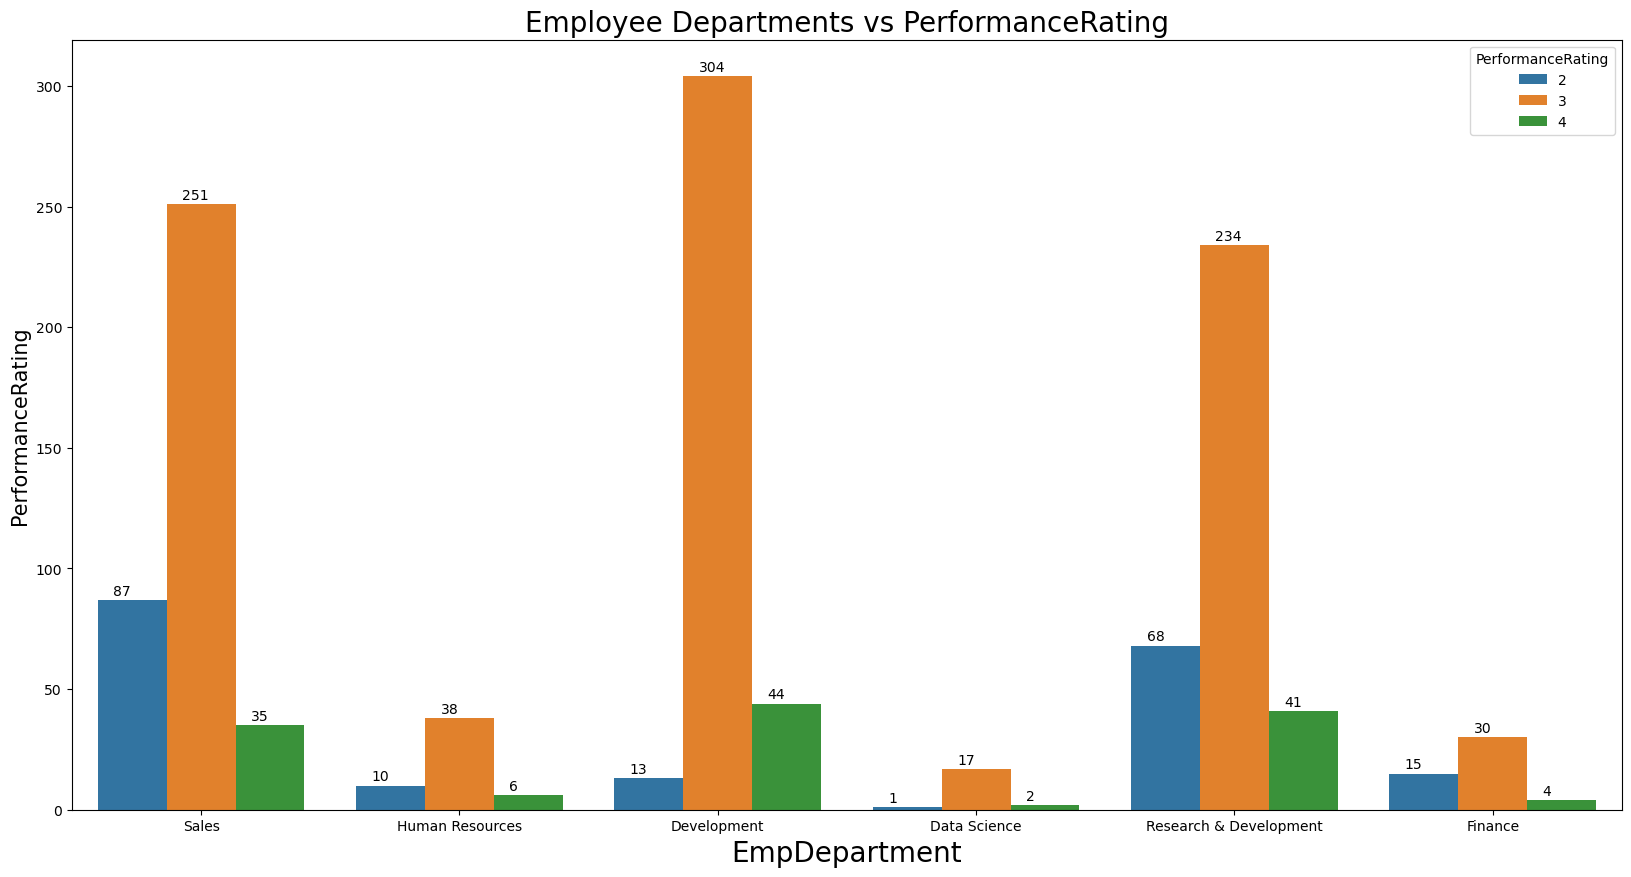

In [108]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()


**Observation:**

**From the above graph we can conclude that from the EmpDepartment 'Development department' is showing High performance rating.It is followed by 'Sales', 'Research and Development','Human Resource','Finance' and the department with least performance rate is 'data science'.**

***Sales:*** The Performace rating level 3 is more in the sales department followed by 2 and then 4.

***Human Resources:*** The majority of the employees lye under level 3 followed by 2 and 4 almost under same possition.

***Development:*** The maximum number of employees are level 3 performers followed by 4 and then 2. 

***Data Science:*** The highest average of level 3 performance is in data science department followed by 4 and then 2. Data science is the only department where less number of level 2 performers.

***Research & Development:***The majority of the employees lye under level 3 followed by 2 and then 4.

***Finance:***The majority of the employees lye under level 3 followed by 2 and then 4.

## Data Preprocessing and Feature engineering

In [61]:
categorical_col = []#list
for column in data.columns:#for loop to acess columns form dataset
    if data[column].dtype == object and len(data[column].unique()) <= 50:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50 
        categorical_col.append(column)#appending those columns in the list who statisfy the condition 
        print(f"{column} : {data[column].unique()}")#output
        print("====================================")

Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime : ['No' 'Yes']
Attrition : ['No' 'Yes']


#### Converting categorical variables into numerical

#### (1) Gender

In [62]:
data.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [63]:
data.Gender=pd.get_dummies(data.Gender,drop_first=True)
data.Gender


0       1
1       1
2       1
3       1
4       1
       ..
1195    0
1196    1
1197    1
1198    0
1199    0
Name: Gender, Length: 1200, dtype: uint8

#### (2)EducationBackground 

In [64]:
data.EducationBackground=data.EducationBackground.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0 })


#### (3)EmpDepartment 

In [65]:
data.EmpDepartment=data.EmpDepartment.map({'Research & Development':3,'Sales':5,'Human Resources':2,'Development':4,'Finance':1,'Data Science':0})#imputation using map function


#### (4)BusinessTravelFrequency

In [66]:
data.BusinessTravelFrequency=data.BusinessTravelFrequency.map({'Travel_Frequently':1,'Travel_Rarely':2,'Non-Travel':0})


#### (5)Attrition

In [67]:
data.Attrition=data.Attrition.map({'Yes':1,'No':0})

#### (6)EmpJobRole

In [68]:
data.EmpJobRole=data.EmpJobRole.map({'Sales Executive':18, 'Manager':11, 'Developer':17, 'Sales Representative':14,
 'Human Resources':9, 'Senior Developer':12, 'Data Scientist':5,
 'Senior Manager R&D':1, 'Laboratory Technician':13, 'Manufacturing Director':7,
 'Research Scientist':15, 'Healthcare Representative':6, 'Research Director':4,
 'Manager R&D':16, 'Finance Manager':10, 'Technical Architect':1, 'Business Analyst':3,
 'Technical Lead':8, 'Delivery Manager':0})

#### (7)Encoding MaritalStatus

In [69]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
data.MaritalStatus=label.fit_transform(data.MaritalStatus)#applying label encoder to  marital status

#### (8)OverTime 

In [70]:
data.OverTime=label.fit_transform(data.OverTime)#label encoding

In [71]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,2,5,18,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,3,2,5,18,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,5,1,5,18,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,2,11,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,3,2,5,18,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [72]:
data.dtypes

Age                             int64
Gender                          uint8
EducationBackground             int64
MaritalStatus                   int32
EmpDepartment                   int64
EmpJobRole                      int64
BusinessTravelFrequency         int64
DistanceFromHome                int64
EmpEducationLevel               int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRate                   int64
EmpJobInvolvement               int64
EmpJobLevel                     int64
EmpJobSatisfaction              int64
NumCompaniesWorked              int64
OverTime                        int32
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TotalWorkExperienceInYears      int64
TrainingTimesLastYear           int64
EmpWorkLifeBalance              int64
ExperienceYearsAtThisCompany    int64
ExperienceYearsInCurrentRole    int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
Attrition                       int64
PerformanceR

***Observation:Now all features are in numericsl form***

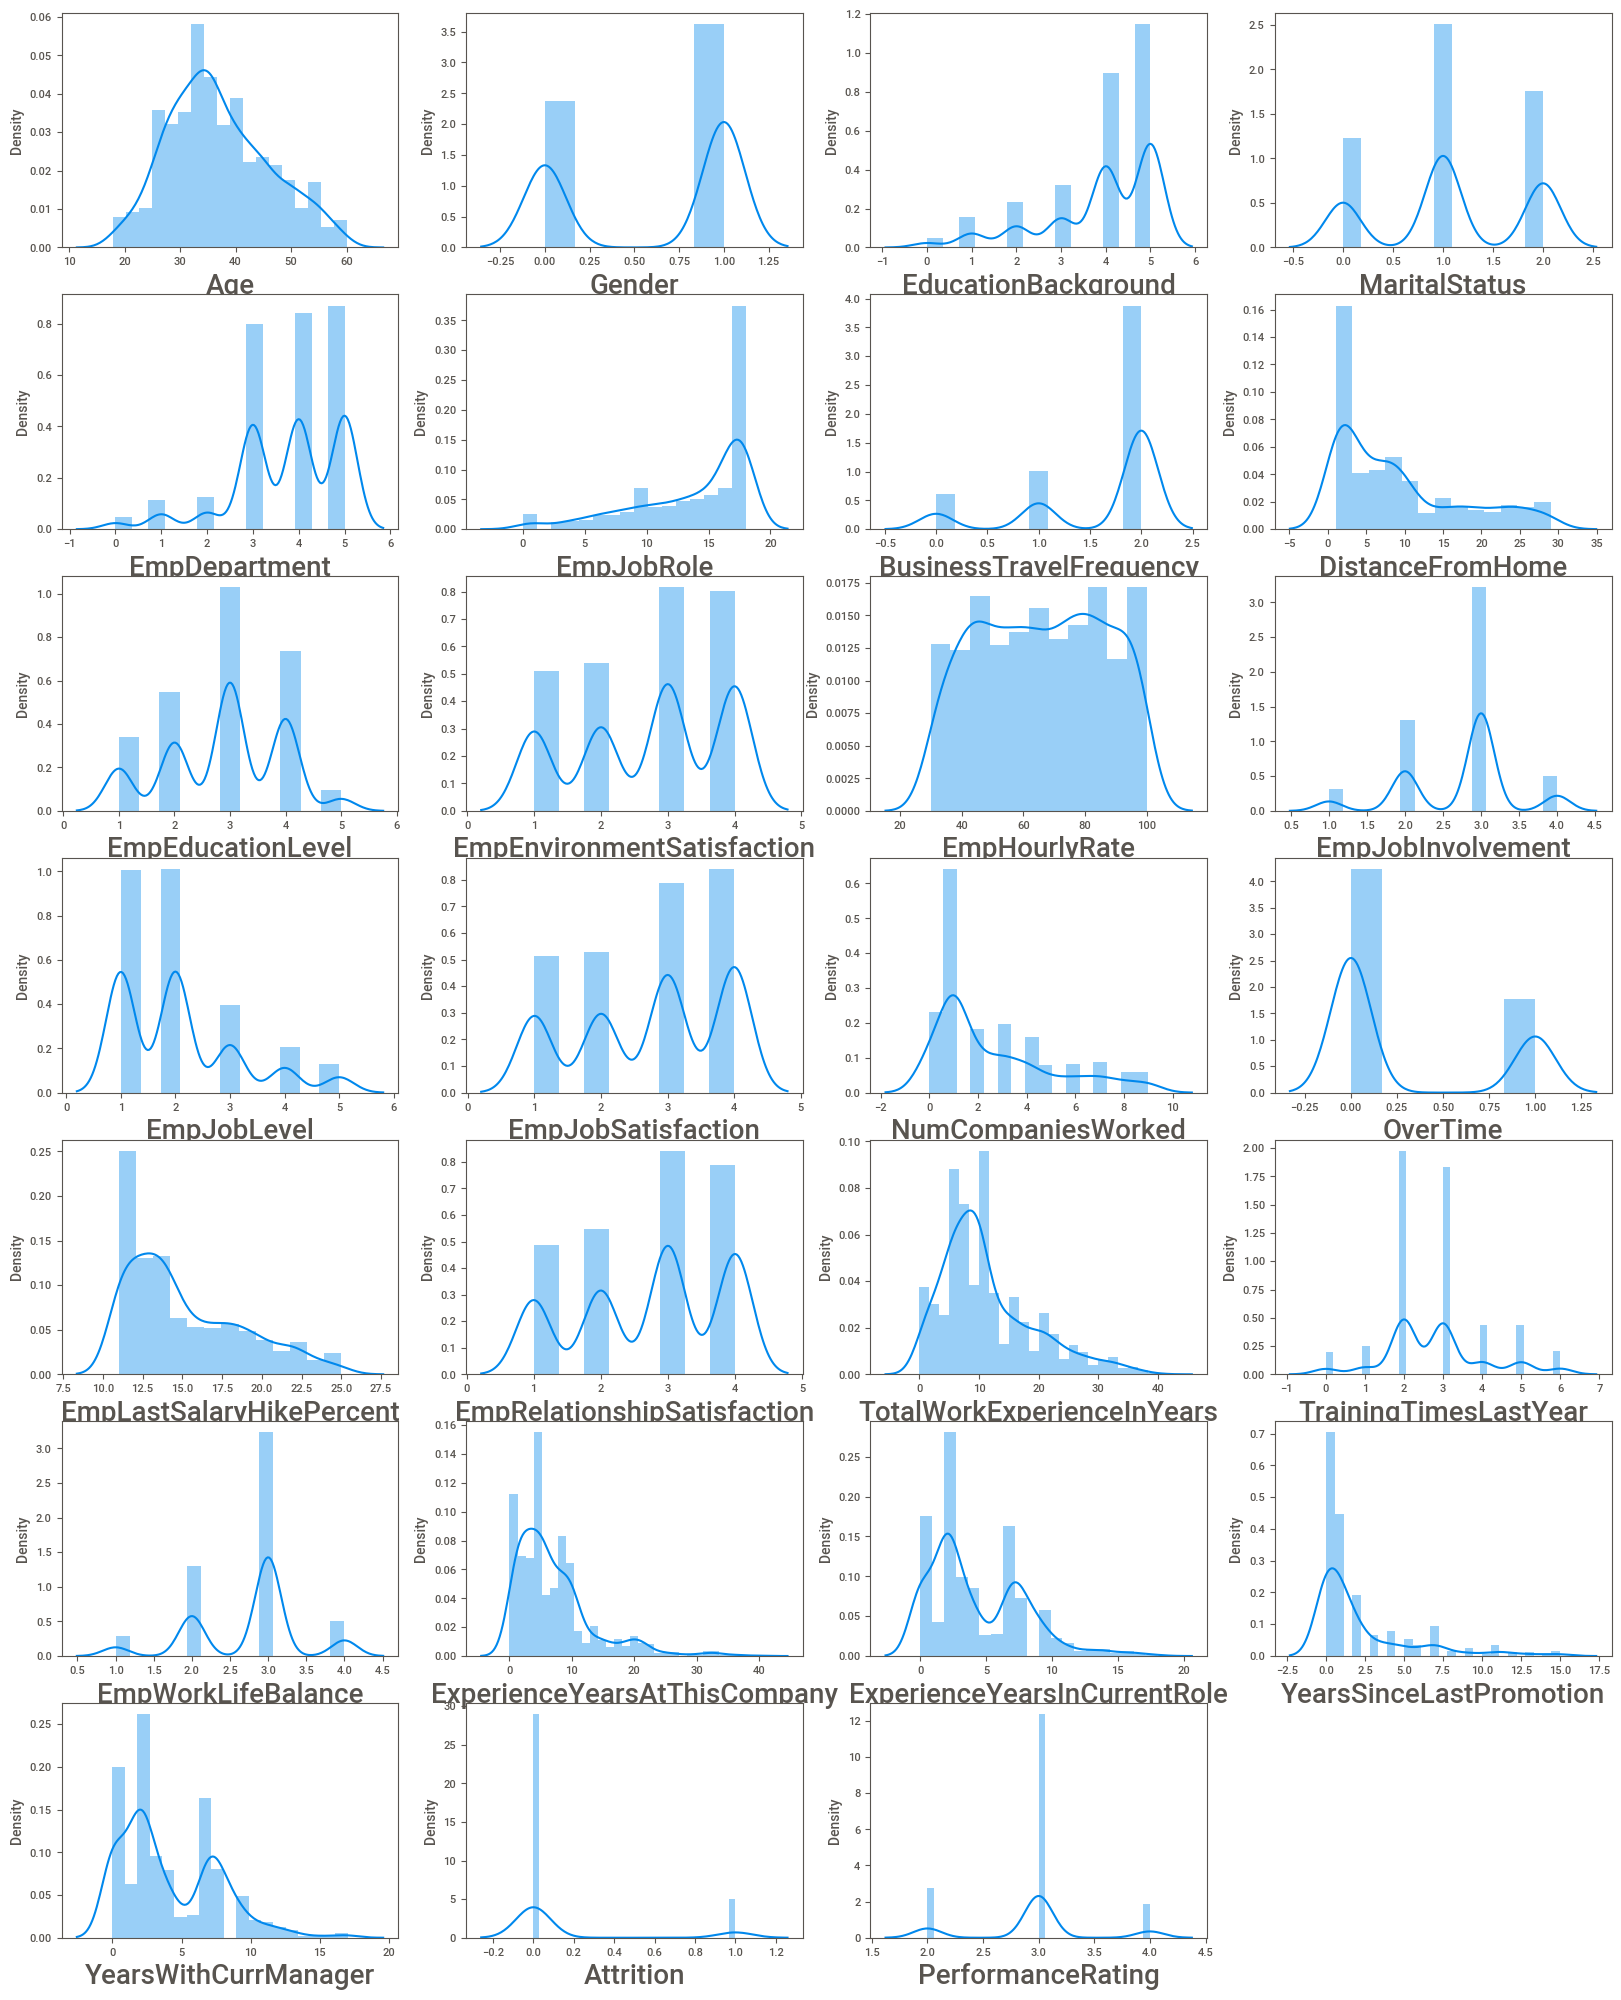

In [33]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1 #maintian count for graph

for column in data:
    if plotnumber<=28 :# as there are 20 columns in the data
        ax = plt.subplot(7,4,plotnumber)# plotting 20 graphs (5-rows,4-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

***Observation:Since not all features are having a normal distribution we will use IQR to find the outliers***

### Outlier Analysis

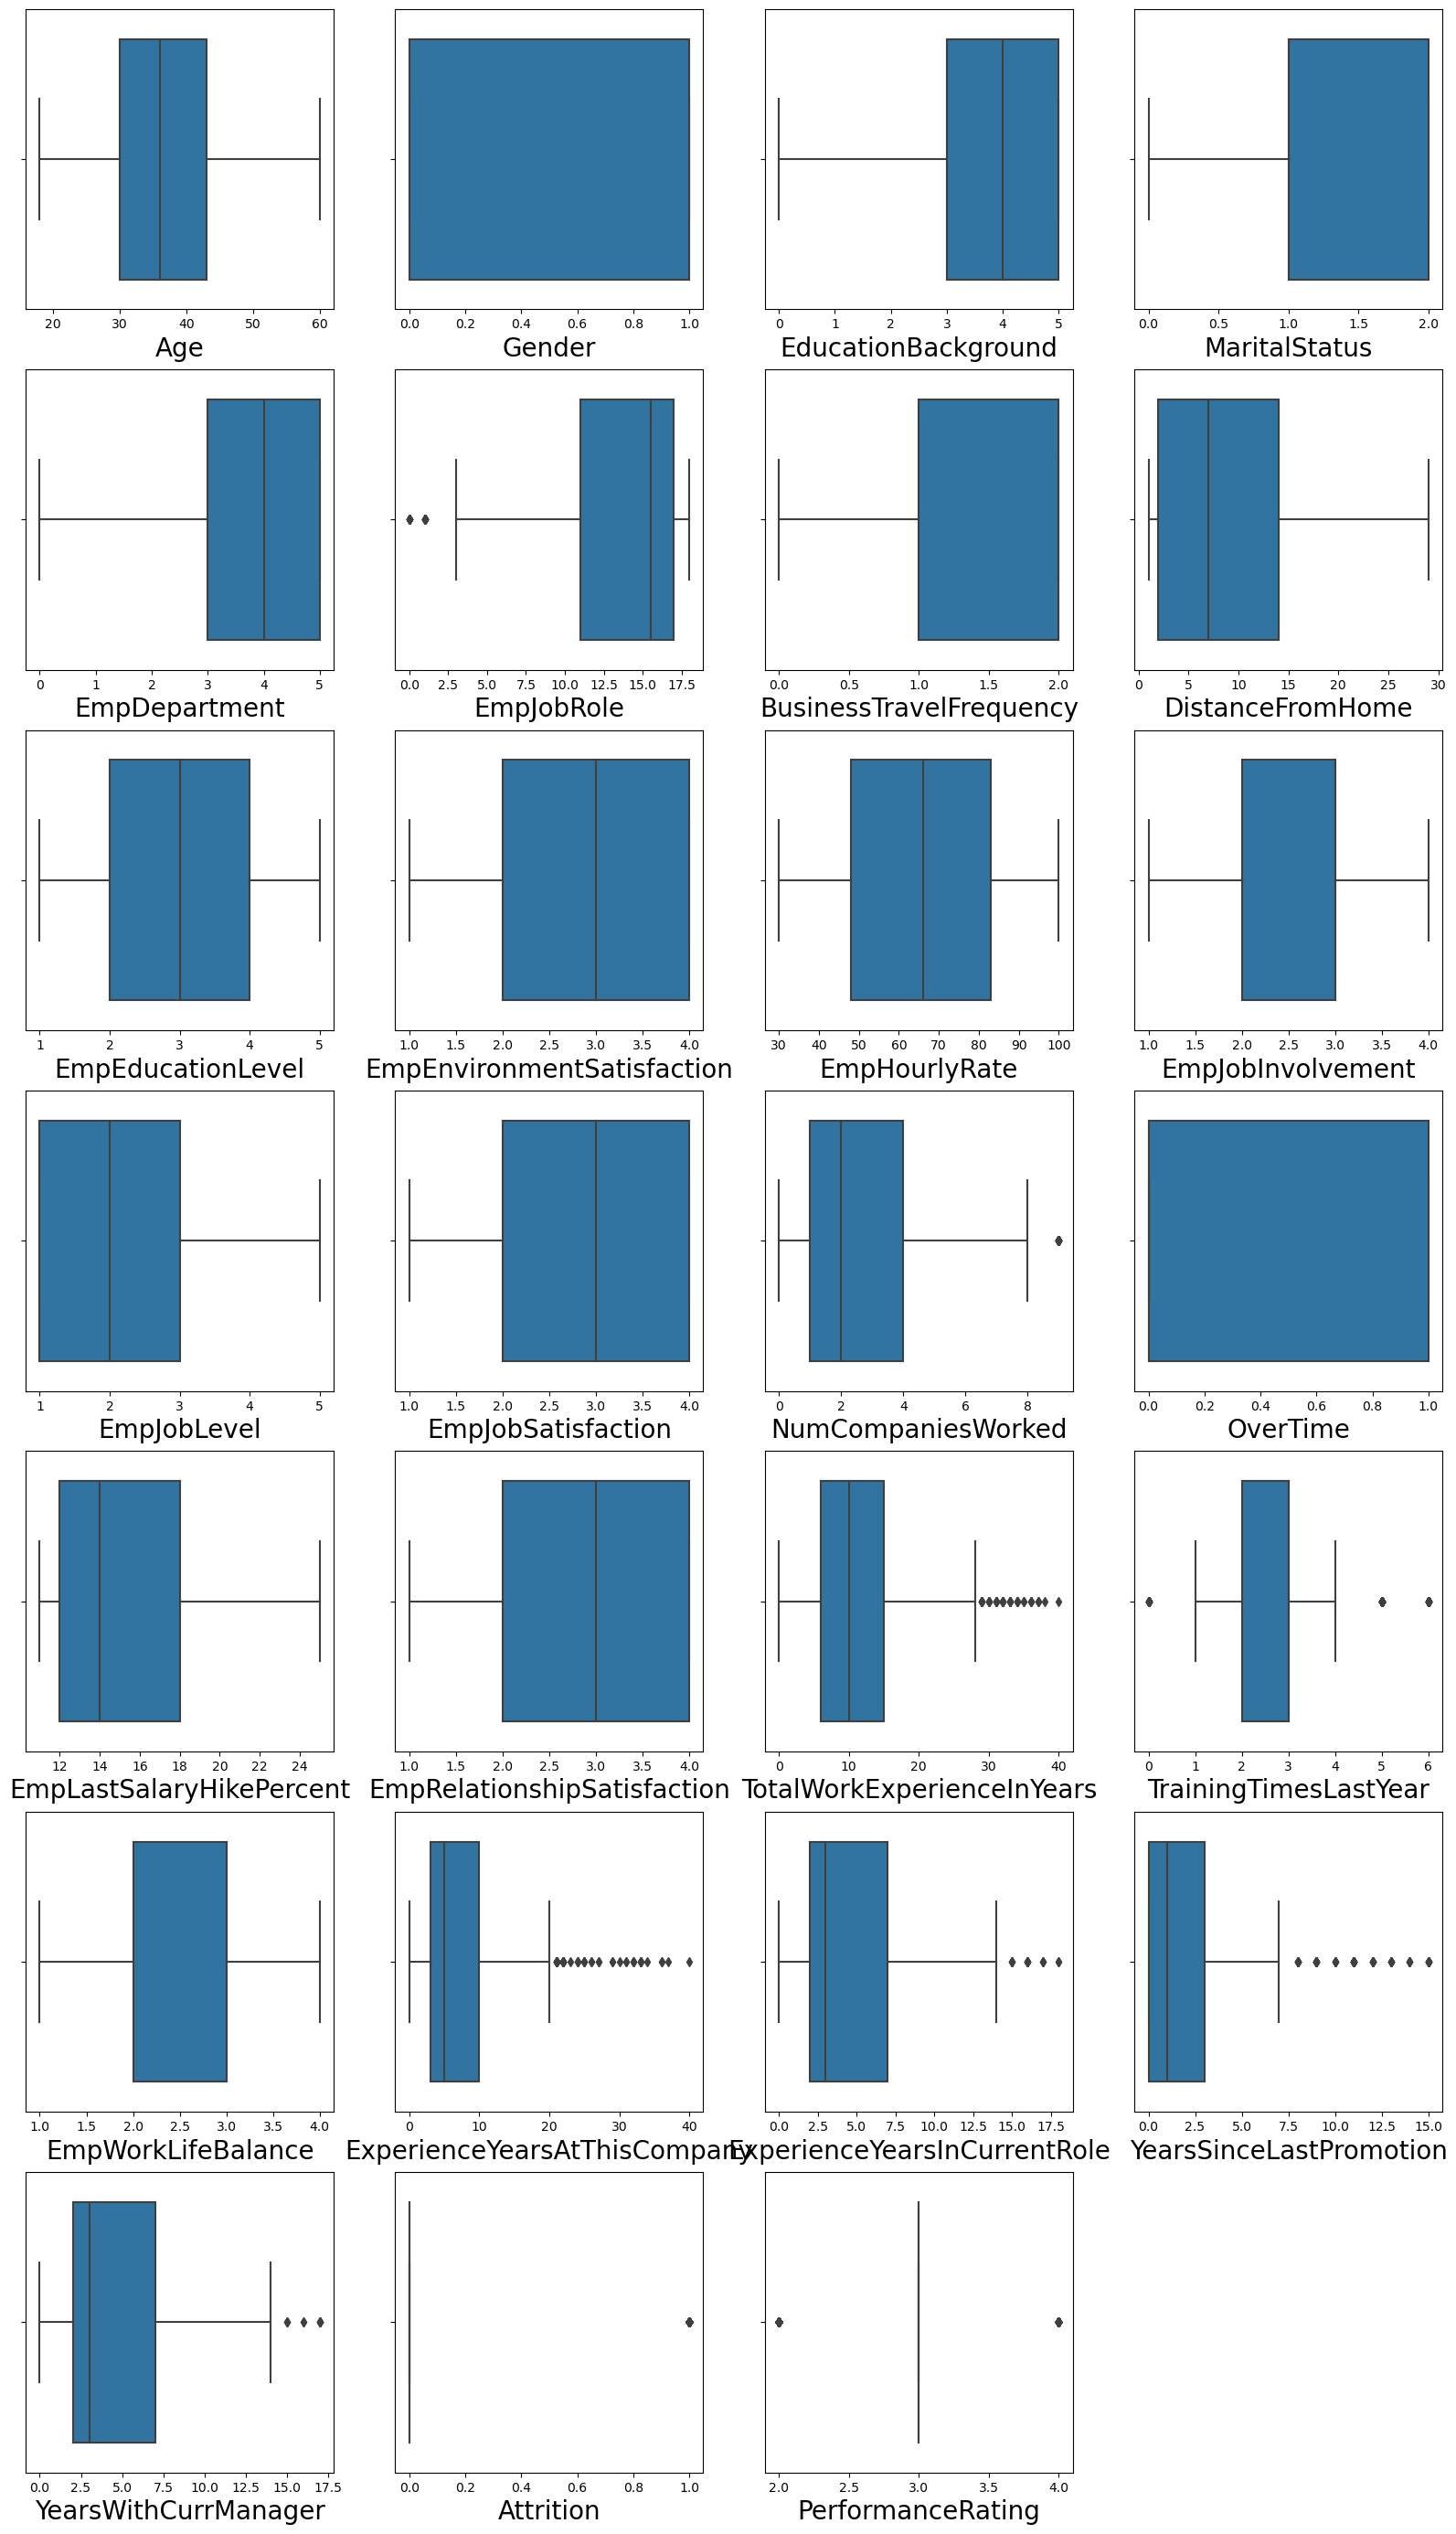

In [73]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=28:
        ax = plt.subplot(7,4,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

***Observation:Since all other outliers except the outlier for the feature 'TrainingTimesLastYear' are within 5% limit we are removing outlier of this feature only.***

In [74]:
from scipy import stats

In [75]:
IQR=stats.iqr(data.TrainingTimesLastYear,interpolation='midpoint')
IQR

1.0

In [76]:
Q1=data.TrainingTimesLastYear.quantile(0.25)
Q3=data.TrainingTimesLastYear.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
max_limit

4.5

In [77]:
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

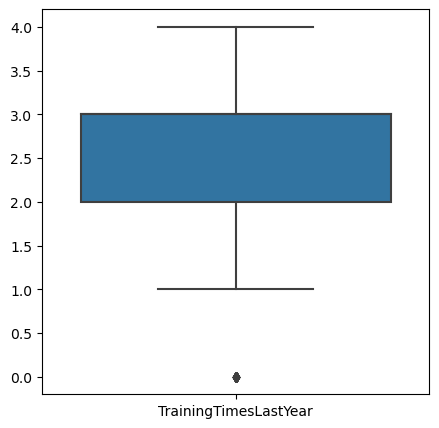

In [78]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data[['TrainingTimesLastYear']])
plt.show()

## Feature Selection

<AxesSubplot:>

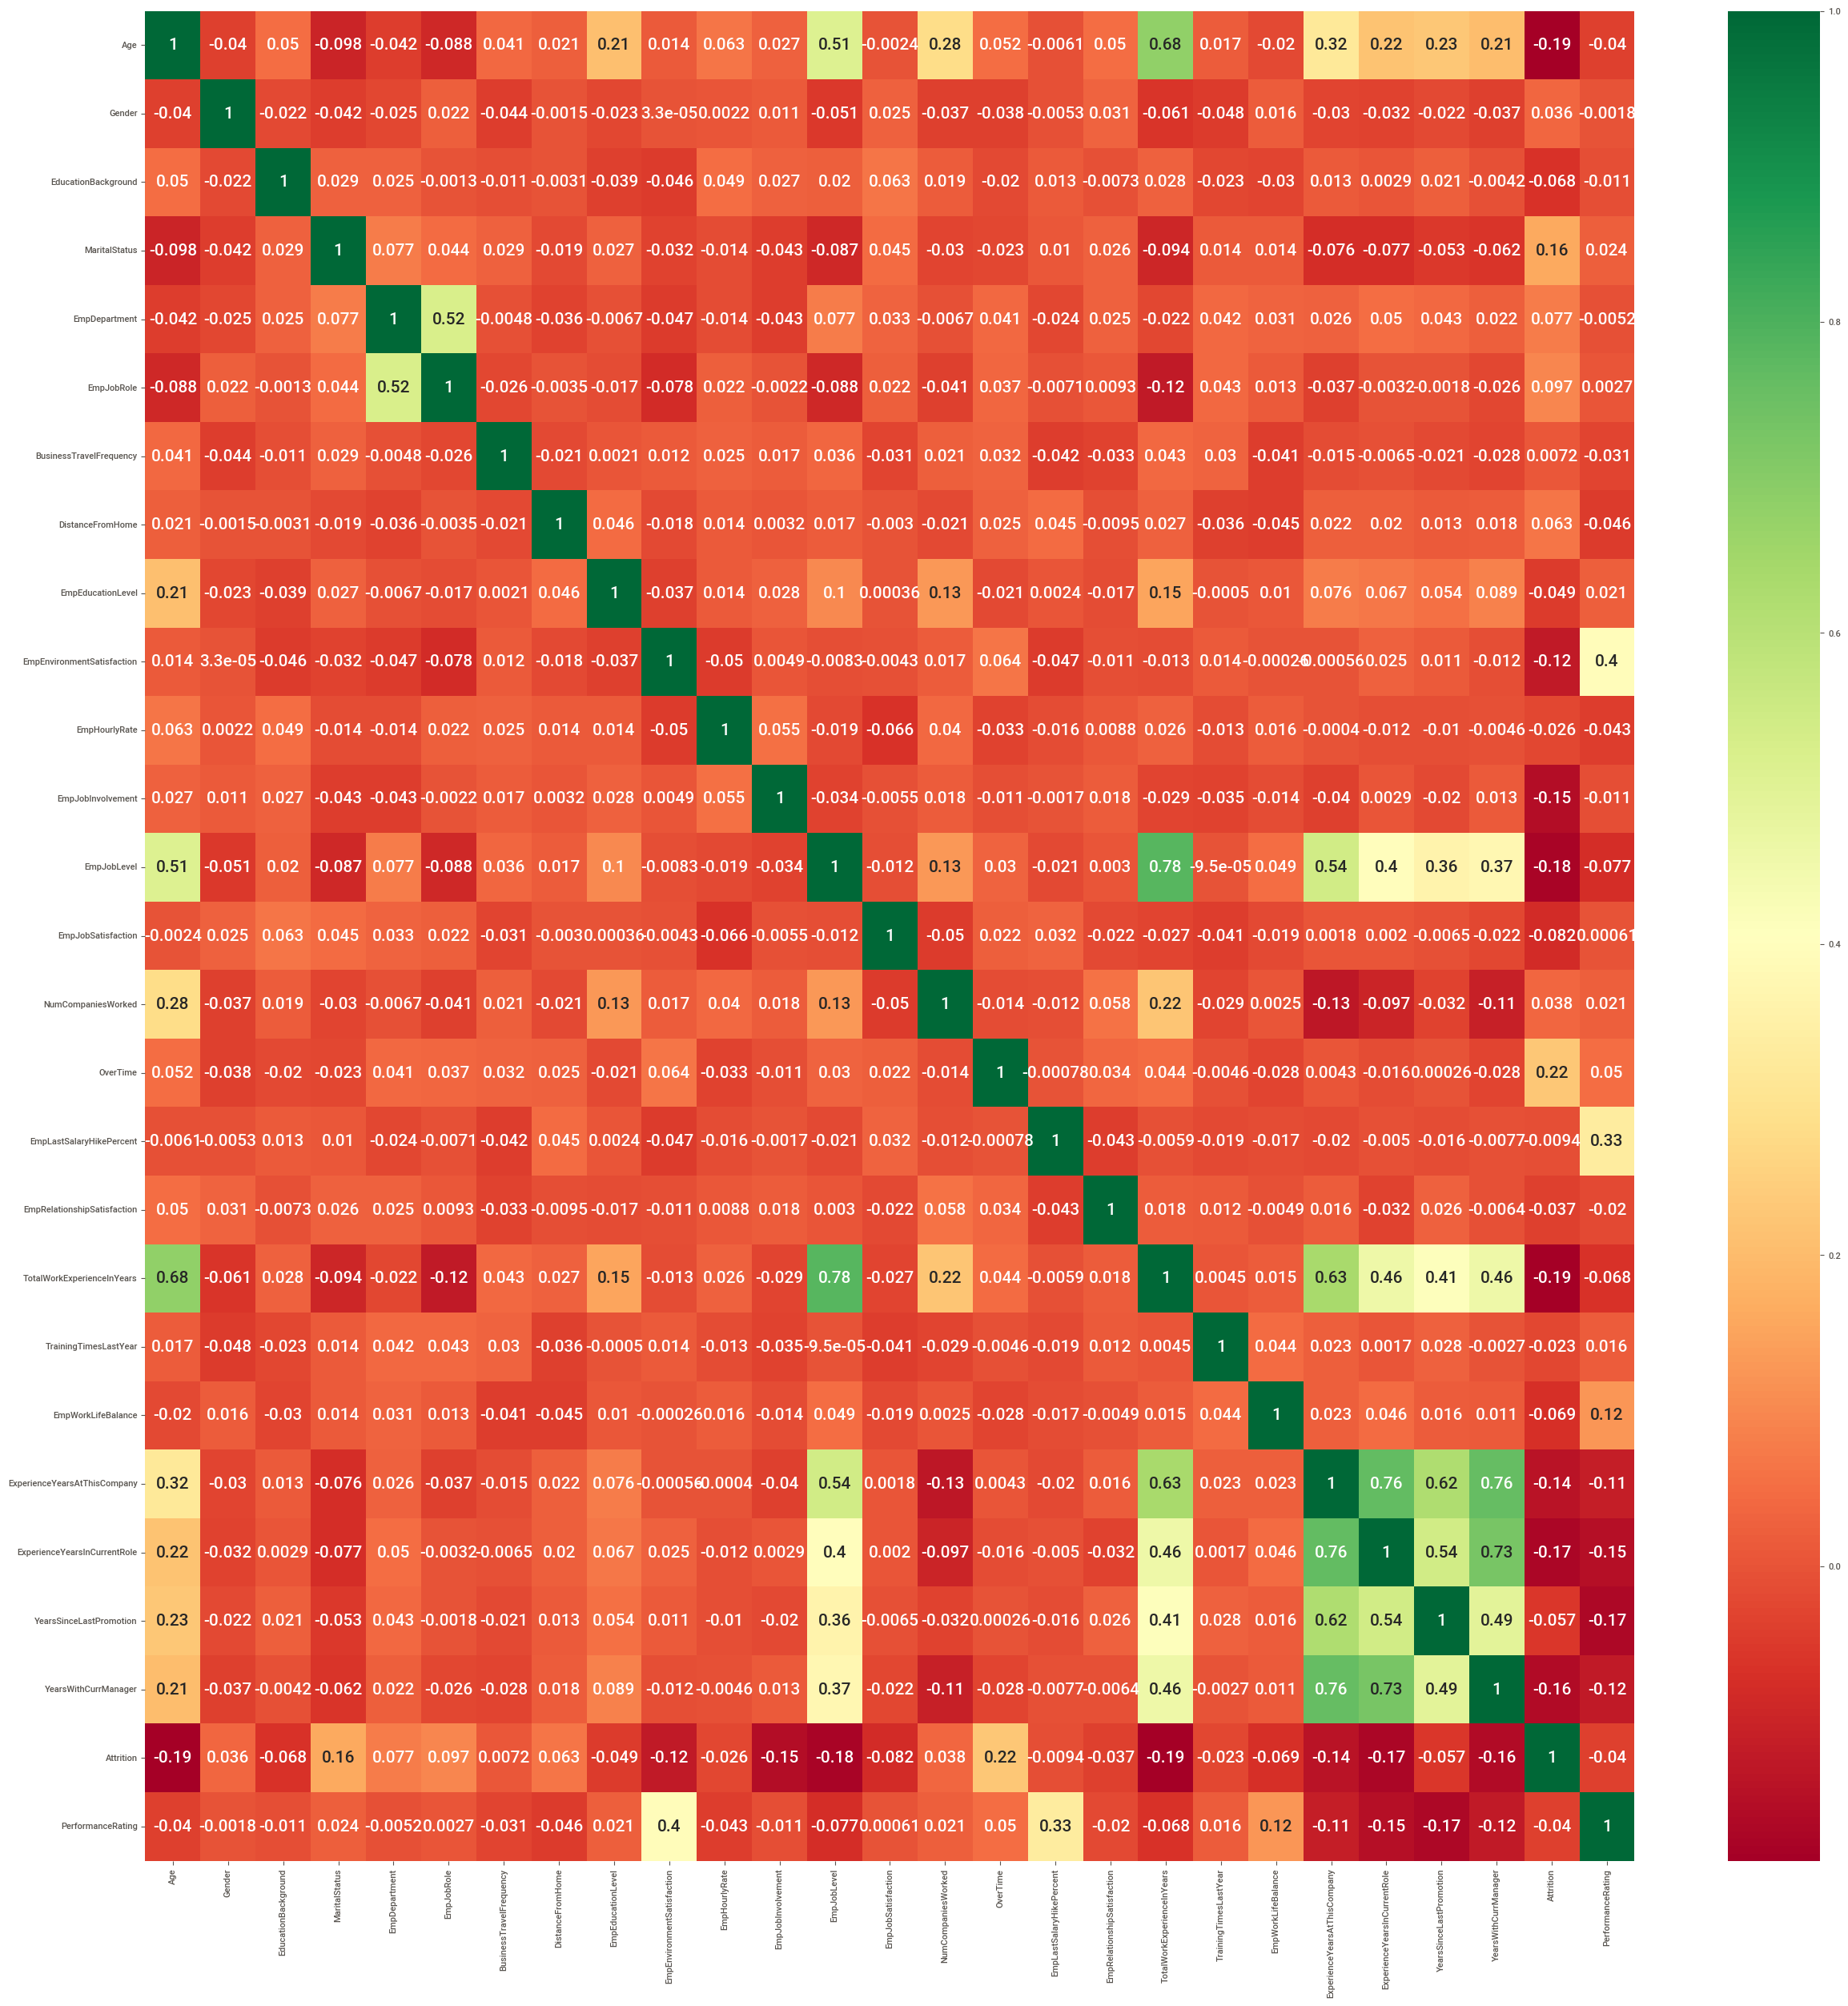

In [40]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15}) # plotting heat map to check correlation

***Observation:None of the features are highly correlated(more than 0.90) thus we are good to go***

## Model Creation

In [79]:
## Creating independent and dependent variable
X = data.drop('PerformanceRating', axis=1)#independent variable 
y = data.PerformanceRating#dependent variable 

In [80]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [81]:
# Checking the dimension of our train and test splits
print('Shape of x_train: ',X_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of x_test: ',X_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (900, 26)
Shape of y_train:  (900,)
Shape of x_test:  (300, 26)
Shape of y_test:  (300,)


## 1. Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier() #object creation for decision tree  
dt.fit(X_train, y_train) #training the model

DecisionTreeClassifier()

In [45]:
y_hat=dt.predict(X_train)#prediction
y_hat1=dt.predict(X_test)#prediction

In [86]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,recall_score,precision_score

In [47]:
print(classification_report(y_train,y_hat)) # train data

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00       647
           4       1.00      1.00      1.00       104

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [48]:
print(classification_report(y_test,y_hat1)) # test data

              precision    recall  f1-score   support

           2       0.73      0.80      0.77        45
           3       0.94      0.93      0.93       227
           4       0.85      0.79      0.81        28

    accuracy                           0.90       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.90      0.90      0.90       300



***observation:accuracy score of train data is 100% and that of test data is 90% hence the model is overfitted***

## Hyperparameter tunning for decision tree

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1,20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=3, cv=3)

#passing model to gridsearchCV 

#tree_cv.fit(X_train,y_train)#training data on gridsearch cv
#best_params = tree_cv.best_params_#it will give you best parameters 
#print(f"Best paramters: {best_params})")#printing  best parameters


In [51]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf= 1,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [52]:
dt1.fit(X_train, y_train)#traing model with best parameter

DecisionTreeClassifier(max_depth=6)

In [53]:
y_pred_train1  = dt1.predict(X_train)

In [54]:
print(classification_report(y_train, y_pred_train1))   #train data

              precision    recall  f1-score   support

           2       0.91      0.92      0.92       149
           3       0.97      0.97      0.97       647
           4       0.94      0.94      0.94       104

    accuracy                           0.96       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.96      0.96      0.96       900



In [55]:
y_hat1 = dt1.predict(X_test)#predicting

In [56]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy #test data

              precision    recall  f1-score   support

           2       0.78      0.87      0.82        45
           3       0.95      0.92      0.94       227
           4       0.74      0.82      0.78        28

    accuracy                           0.90       300
   macro avg       0.83      0.87      0.85       300
weighted avg       0.91      0.90      0.91       300



***Observation:The accuracy of trained data after using hyperparameter tuning is 96% and that of test data is 90%***

## 2. RandomForest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
MR=RandomForestClassifier(n_estimators=100)
MR.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
rf_hat=MR.predict(X_train)#prediction
rf_pred=MR.predict(X_test)

In [59]:
print(classification_report(y_train,rf_hat))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00       647
           4       1.00      1.00      1.00       104

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [60]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           2       0.86      0.82      0.84        45
           3       0.93      0.97      0.95       227
           4       0.95      0.68      0.79        28

    accuracy                           0.92       300
   macro avg       0.91      0.82      0.86       300
weighted avg       0.92      0.92      0.92       300



***observation:accuracy score of train data is 100% and that of test data is 92% hence the model is overfitted***

## Hyperparameter tunning for RandomForest

In [61]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1,param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

#rf_cv.fit(X_train, y_train)##training data on randomsearch cv
#rf_best_params = rf_cv.best_params_##it will give you best parameters 
#print(f"Best paramters: {rf_best_params})")##printing  best parameters
 


In [62]:
rf_clf2 = RandomForestClassifier(n_estimators=400,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=30,bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(X_train, y_train)
y_predict=rf_clf2.predict(X_test)#testing


In [63]:
y_pred_train  = rf_clf2.predict(X_train)#training

In [64]:
print(classification_report(y_train, y_pred_train))   #train data

              precision    recall  f1-score   support

           2       0.99      0.95      0.97       149
           3       0.97      1.00      0.98       647
           4       0.99      0.85      0.91       104

    accuracy                           0.97       900
   macro avg       0.98      0.93      0.95       900
weighted avg       0.97      0.97      0.97       900



In [65]:
print(classification_report(y_test, y_predict))   #test data

              precision    recall  f1-score   support

           2       0.84      0.84      0.84        45
           3       0.94      0.96      0.95       227
           4       0.95      0.71      0.82        28

    accuracy                           0.92       300
   macro avg       0.91      0.84      0.87       300
weighted avg       0.92      0.92      0.92       300



***Observation:The accuracy of trained data after using hyperparameter tuning is 97% and that of test data is 92%***

In [66]:
imp=rf_clf2.feature_importances_
imp

array([0.02809913, 0.00334303, 0.00947629, 0.00721386, 0.04208846,
       0.04092582, 0.00626793, 0.02317173, 0.01227037, 0.22095124,
       0.03637924, 0.01068595, 0.01005695, 0.00979575, 0.01747941,
       0.00597753, 0.25624917, 0.00974962, 0.02407479, 0.01109477,
       0.02565844, 0.0296968 , 0.03881398, 0.09316607, 0.02218056,
       0.00513311])

<AxesSubplot:>

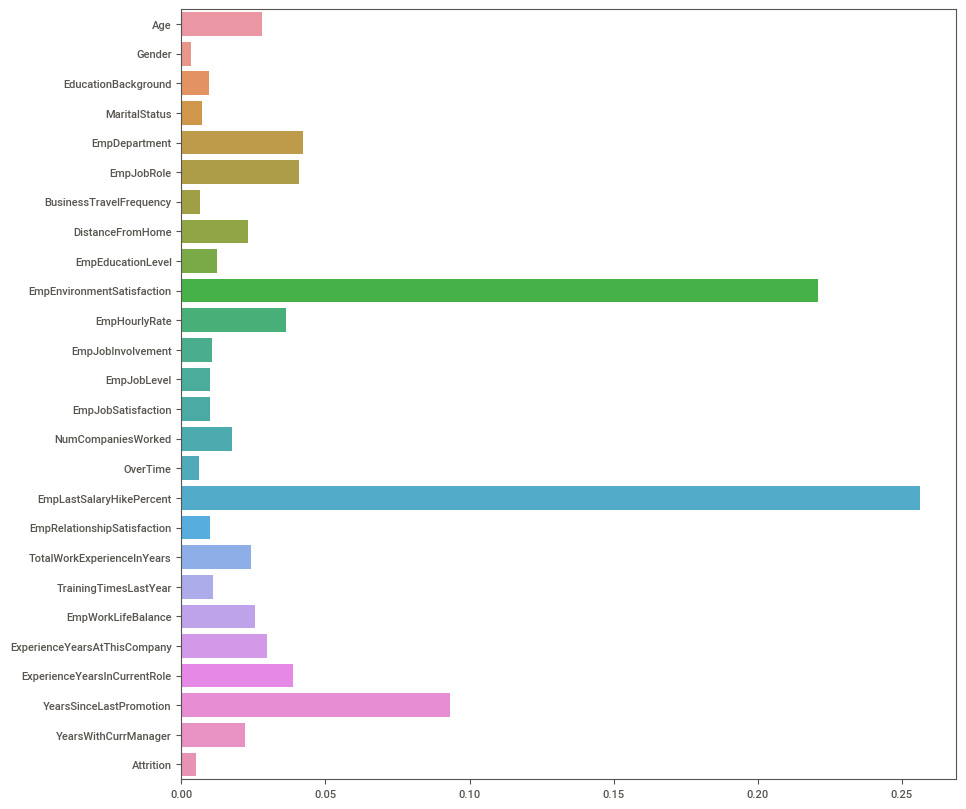

In [67]:
plt.figure(figsize=(10, 10))
sns.barplot(y=data.columns[:26],x=imp)

***Observation:The top 3 Important Factors effecting employee performance are: 'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction', 'YearsSinceLastPromotion'***

## 3. Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
dt=GradientBoostingClassifier()
dt.fit(X_train, y_train)

GradientBoostingClassifier()

In [69]:
y_pred2=dt.predict(X_train)
y_pred3=dt.predict(X_test)

In [70]:
print(classification_report(y_train,y_pred2))   #train data

              precision    recall  f1-score   support

           2       0.98      0.99      0.99       149
           3       1.00      1.00      1.00       647
           4       1.00      1.00      1.00       104

    accuracy                           1.00       900
   macro avg       0.99      1.00      0.99       900
weighted avg       1.00      1.00      1.00       900



In [71]:
print(classification_report(y_test, y_pred3)) #test data

              precision    recall  f1-score   support

           2       0.81      0.84      0.83        45
           3       0.94      0.96      0.95       227
           4       0.91      0.75      0.82        28

    accuracy                           0.92       300
   macro avg       0.89      0.85      0.87       300
weighted avg       0.92      0.92      0.92       300



***Observation:The accuracy of trained data is 100% and that of test data is 92 hence the model is overfitted%***

## Hyperparameter tunning for Gradient Boosting

In [72]:
gb_classifier = GradientBoostingClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)



#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)

In [73]:
best_gb_classifier = GradientBoostingClassifier(learning_rate= 0.01, max_depth=3, n_estimators= 300)

In [74]:
# Fit the classifier to the training data
best_gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_ht=best_gb_classifier.predict(X_train)
y_hat3_pr = best_gb_classifier.predict(X_test)


In [75]:
print(classification_report(y_train,y_ht))

              precision    recall  f1-score   support

           2       0.91      0.92      0.91       149
           3       0.96      0.98      0.97       647
           4       0.98      0.86      0.91       104

    accuracy                           0.95       900
   macro avg       0.95      0.92      0.93       900
weighted avg       0.95      0.95      0.95       900



In [76]:
print(classification_report(y_test,y_hat3_pr))

              precision    recall  f1-score   support

           2       0.78      0.87      0.82        45
           3       0.95      0.95      0.95       227
           4       0.95      0.75      0.84        28

    accuracy                           0.92       300
   macro avg       0.89      0.86      0.87       300
weighted avg       0.92      0.92      0.92       300



***Observation:The accuracy of trained data is 95% and that of test data is 92%***

## 4. Artificial Neural Network

In [82]:
# Training the model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [84]:
y_hat_mlp = mlp.predict(X_train)
y_predict_mlp = mlp.predict(X_test)

In [87]:
print(classification_report(y_train,y_hat_mlp))

              precision    recall  f1-score   support

           2       0.58      0.40      0.48       149
           3       0.76      0.93      0.84       647
           4       0.00      0.00      0.00       104

    accuracy                           0.74       900
   macro avg       0.45      0.45      0.44       900
weighted avg       0.64      0.74      0.68       900



In [88]:
print(classification_report(y_test,y_predict_mlp))

              precision    recall  f1-score   support

           2       0.62      0.47      0.53        45
           3       0.80      0.94      0.87       227
           4       0.00      0.00      0.00        28

    accuracy                           0.78       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.70      0.78      0.74       300



***Observation:The accuracy of trained data is 74% and that of test data is 78%***

## 5. Logistic Regression 

### Scaling data

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [78]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data, y,random_state=3)

In [79]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [80]:
y_pred1 = LR.predict(X_train)

In [81]:
y_pred = LR.predict(X_test)

In [82]:
print(classification_report(y_train, y_pred1)) #train data

              precision    recall  f1-score   support

           2       0.59      0.42      0.49       149
           3       0.84      0.92      0.88       647
           4       0.83      0.67      0.74       104

    accuracy                           0.81       900
   macro avg       0.76      0.67      0.71       900
weighted avg       0.80      0.81      0.80       900



In [83]:
print(classification_report(y_test, y_pred)) #test data

              precision    recall  f1-score   support

           2       0.54      0.47      0.50        45
           3       0.88      0.91      0.89       227
           4       0.73      0.68      0.70        28

    accuracy                           0.82       300
   macro avg       0.72      0.68      0.70       300
weighted avg       0.81      0.82      0.82       300



***Observation:Accuracy of trained data is 81% and that of test data is 82%***

## 6. Support Vector Machine

In [84]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default pbarameters
svclassifier.fit(X_train, y_train)

SVC()

In [85]:
sv_hat=svclassifier.predict(X_train)#prediction


In [86]:
print(classification_report(y_train,sv_hat))

              precision    recall  f1-score   support

           2       0.98      0.59      0.74       149
           3       0.88      1.00      0.93       647
           4       0.99      0.72      0.83       104

    accuracy                           0.90       900
   macro avg       0.95      0.77      0.83       900
weighted avg       0.91      0.90      0.89       900



In [87]:
y_hat=svclassifier.predict(X_test)

In [88]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.57      0.27      0.36        45
           3       0.81      0.96      0.88       227
           4       0.91      0.36      0.51        28

    accuracy                           0.80       300
   macro avg       0.76      0.53      0.59       300
weighted avg       0.79      0.80      0.77       300



***Observation:The accuracy of trained data is 90% and that of test data is 80%***

## Bagging for Support Vector Machine

In [89]:
from sklearn.ensemble import BaggingClassifier#import bagging 
model_bagg1=BaggingClassifier(base_estimator=svclassifier,n_estimators=20) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(X_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(X_test) ## getting the prediction

In [90]:
y_hat_bagg1=model_bagg1.predict(X_train)

In [91]:
print(classification_report(y_train,y_hat_bagg1))

              precision    recall  f1-score   support

           2       0.97      0.64      0.77       149
           3       0.89      0.99      0.94       647
           4       0.98      0.78      0.87       104

    accuracy                           0.91       900
   macro avg       0.95      0.81      0.86       900
weighted avg       0.92      0.91      0.90       900



In [92]:
print(classification_report(y_test,y_hat_bagg))

              precision    recall  f1-score   support

           2       0.58      0.33      0.42        45
           3       0.82      0.95      0.88       227
           4       0.92      0.39      0.55        28

    accuracy                           0.81       300
   macro avg       0.77      0.56      0.62       300
weighted avg       0.80      0.81      0.78       300



***Observation:The accuracy of trained data is 91% and that of test data is 81%***

## 7. K Nearest Neighbour

In [93]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier(n_neighbors=5) ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test) ## getting the predict from created model

In [94]:
knn_tr=KNN1.predict(X_train)

In [95]:
print(classification_report(y_train,knn_tr))

              precision    recall  f1-score   support

           2       0.68      0.42      0.52       149
           3       0.81      0.96      0.88       647
           4       0.90      0.37      0.52       104

    accuracy                           0.80       900
   macro avg       0.80      0.58      0.64       900
weighted avg       0.80      0.80      0.78       900



In [96]:
print(classification_report(y_test,y_hat_knn))

              precision    recall  f1-score   support

           2       0.37      0.31      0.34        45
           3       0.80      0.90      0.84       227
           4       0.50      0.11      0.18        28

    accuracy                           0.74       300
   macro avg       0.56      0.44      0.45       300
weighted avg       0.70      0.74      0.71       300



***Observation:The accuracy of trained data is 80% and that of test data is 74%***

## Principal Component Analysis

In [97]:
df=pd.DataFrame(data=scaled_data,columns=X.columns)

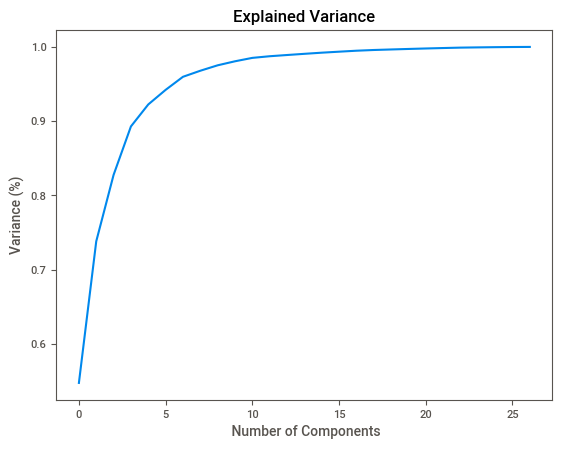

In [98]:
## Getting the optimal number of PCA
from sklearn.decomposition import PCA
pca=PCA()
principalComponents=pca.fit_transform(data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(" Number of Components")
plt.ylabel('Variance (%)') # for each components
plt.title("Explained Variance")
plt.show()

In [117]:
pca=PCA(n_components=10)
new_data=pca.fit_transform(df)
i=1
for i in range(1,10):
    i=i+1
    print(i)
principal_df=pd.DataFrame(data=new_data,columns=print(i))

2
3
4
5
6
7
8
9
10
10


In [118]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.16024778 0.22821718 0.28754183 0.33739194 0.38288902 0.42622089
 0.46886437 0.51090593 0.55140674 0.5902356 ]


## Fitting Models after Principal Component Analysis

# Logistic Regression with Principal Component Analysis

In [119]:
scaled_data=scaler.fit_transform(new_data)

In [120]:
X_train_pca,X_test_pca,y_train,y_test=train_test_split(scaled_data, y,random_state=3)

In [121]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_pca, y_train)

LogisticRegression()

In [122]:
y_pred1 = LR.predict(X_train_pca)


In [123]:
y_pred = LR.predict(X_test_pca)


In [124]:
print(classification_report(y_test, y_pred)) #test data

              precision    recall  f1-score   support

           2       0.58      0.31      0.41        45
           3       0.81      0.94      0.87       227
           4       0.43      0.21      0.29        28

    accuracy                           0.78       300
   macro avg       0.61      0.49      0.52       300
weighted avg       0.74      0.78      0.75       300



In [125]:
print(classification_report(y_train, y_pred1)) #train data

              precision    recall  f1-score   support

           2       0.58      0.24      0.34       149
           3       0.76      0.95      0.84       647
           4       0.47      0.15      0.23       104

    accuracy                           0.74       900
   macro avg       0.60      0.45      0.47       900
weighted avg       0.70      0.74      0.69       900



***Observation:Accuracy of train & test are reducing after fitting pca for logistic regression.***

## RandomForest Classifier with Principal Component Analysis

In [126]:
from sklearn.ensemble import RandomForestClassifier
MR=RandomForestClassifier(n_estimators=100)
MR.fit(X_train_pca,y_train)

RandomForestClassifier()

In [127]:
rf_hat=MR.predict(X_train_pca)#prediction
rf_pred=MR.predict(X_test_pca)

In [128]:
print(classification_report(y_train,rf_hat))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00       647
           4       1.00      1.00      1.00       104

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [129]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           2       0.53      0.22      0.31        45
           3       0.78      0.95      0.86       227
           4       0.40      0.07      0.12        28

    accuracy                           0.76       300
   macro avg       0.57      0.42      0.43       300
weighted avg       0.71      0.76      0.71       300



***Observation:This also shows our data is overfit since trained data gives an accuracy of 100% and tested data gives that of 76%.***

## Hyperparameter tunning for RandomForest with Principal Component Analysis

In [130]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1,param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

#rf_cv.fit(X_train, y_train)##training data on randomsearch cv
#rf_best_params = rf_cv.best_params_##it will give you best parameters 
#print(f"Best paramters: {rf_best_params})")##printing  best parameters

In [131]:
rf_clf2 = RandomForestClassifier(n_estimators=400,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=30,bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=10,
                       n_estimators=400)

In [132]:
y_predict=rf_clf2.predict(X_test_pca)#testing
y_pred_train  = rf_clf2.predict(X_train_pca)#training

In [133]:
print(classification_report(y_train, y_pred_train))   

              precision    recall  f1-score   support

           2       1.00      0.74      0.85       149
           3       0.89      1.00      0.94       647
           4       1.00      0.62      0.77       104

    accuracy                           0.91       900
   macro avg       0.96      0.79      0.86       900
weighted avg       0.92      0.91      0.91       900



In [134]:
print(classification_report(y_test, y_predict))   #test data

              precision    recall  f1-score   support

           2       0.64      0.20      0.31        45
           3       0.78      0.97      0.87       227
           4       0.50      0.07      0.12        28

    accuracy                           0.77       300
   macro avg       0.64      0.41      0.43       300
weighted avg       0.74      0.77      0.71       300



***Observation:Accuracy of train & test are reducing after fitting pca random forest model also.***

## Conclusion:
***1)Department wise performance- Most employees are from  development department with around 300 employees having performance rate of 3,around 10 employees are having performance rate of 2 and around 40 employees are having the rate of 4.The Department having lowest performance rate is Data Science with 25 emploees having performance rate of 3, around 2 employees are having performance rate of 2 and around 3 employees are having the rate of 4 ***

***2)The top 3 Important Factors effecting employee performance are:'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction', 'YearsSinceLastPromotion'***

***3)I have used models such as Decision tree, Randomforest, Gradientboosting (All with and without hyperparameter tuning),and after scaling i have used Logistic Regression,  Support Vector Machine, Bagging of SVM, KNN models, Also fitted Logistic regression and randomforest models using PCA and the best training model to predict the employee performance based on factors as inputs is RandomForest Classifier with hyperparameter tuning.***

***4)The steps the company has to take to improve the employee performance based on insights from analysis are:***

***(a)Employees with a hike percent of 11-14 are giving higher performnace than the employees with high hike Thus, company would need to make hike percent to 11-14 percent for most employees.***

***(b)Employees having high environment satisfaction are giving high performance Thus, the company would need to consider most employees needs and take steps that will make every employees satisfied with their working environment.***

***(c)Employees that got promotion within 0-2 yeears are giving high performance Thus, company has to take steps to give promotions to most employee atleast within these year gaps atleast.***

***Since the important features effecting the performance of employees are'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction', 'YearsSinceLastPromotion'***
